# Comparing ascites vs tumour/healthy DC

## DC2 previously subclustered and found one cluster (cluster 6) enriched in ascites

In [1]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib.pyplot import rc_context
import seaborn as sns

In [2]:
#set current directory 
os.chdir('/scratch/user/s4436039/scdata/Myeloid_Objects')
os.getcwd()

'/scratch/user/s4436039/scdata/Myeloid_Objects'

In [3]:
data_DC2 = sc.read_h5ad('20250629_DC2_bbknn_clustered2.h5ad') 

In [4]:
data_DC2

AnnData object with n_obs × n_vars = 16643 × 2001
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment', 'Guimaraes_DC2_FCER1A', 'Guimaraes_DC2_AREG', 'Guimaraes_Cheng_DC2_CD207/CD1A', 'Guimaraes_DC3_CD14', 'Guimaraes_DC4_FCGR3A', 'Guimaraes_DC_CXCL2', 'Cheng_DC2_CXCR4', 'Cheng_DC2_IL1B', 'Cheng_DC2_FCN1', 'Cheng_DC2_ISG15', 'Cheng_DC2_CXCL9', 

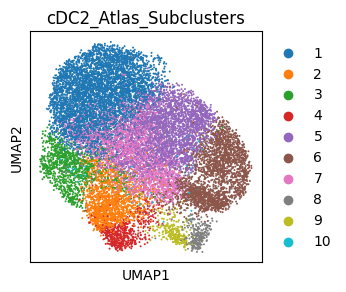

In [5]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data_DC2, color=["cDC2_Atlas_Subclusters"], ncols=4, size=8)

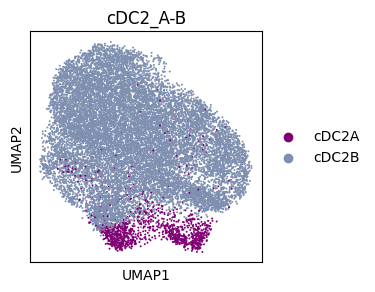

In [6]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data_DC2, color=["cDC2_A-B"], ncols=4, size=8)

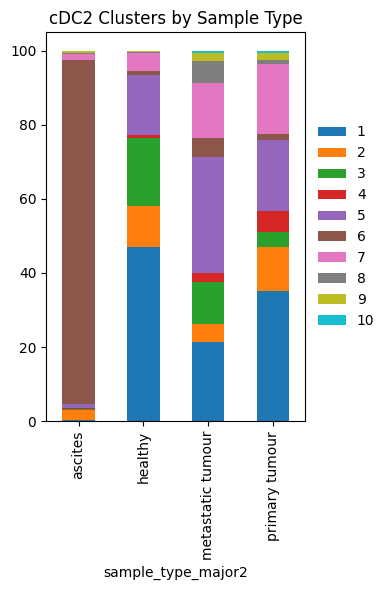

In [7]:
pd.crosstab(data_DC2.obs["sample_type_major2"], data_DC2.obs["cDC2_Atlas_Subclusters"]).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True, figsize=(4,6))
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)
plt.title("cDC2 Clusters by Sample Type")
plt.tight_layout()  
plt.show()

### Calculate DEGs between cluster 6 and other cDC2B

In [8]:
# subset to cDC2B
data_DC2B = data_DC2[data_DC2.obs["cDC2_A-B"] == "cDC2B"]

In [9]:
# check annots
print(data_DC2B.obs['cDC2_Atlas_Subclusters'].value_counts())

cDC2_Atlas_Subclusters
1    4914
5    3078
6    2400
7    2345
2    1538
3    1123
Name: count, dtype: int64


In [33]:
# make meta column for cluster 6 vs not cluster 6
data_DC2B.obs["cDC2c6_status"] = data_DC2.obs["cDC2_Atlas_Subclusters"].map(
    {
        "1": "notc6",
        "5": "notc6",
        "6": "c6",
        "7": "notc6",
        "2": "notc6",
        "3": "notc6"
    }
)

In [34]:
# check annots
print(data_DC2B.obs['cDC2c6_status'].value_counts())

cDC2c6_status
notc6    12998
c6        2400
Name: count, dtype: int64


In [35]:
#calculate DEG genes between cluster 6 and all others:
sc.tl.rank_genes_groups(data_DC2B, groupby="cDC2c6_status", method="wilcoxon", key_added="degs_c6_vs_rest")

/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/plotting/_tools/__init__.py:1320: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


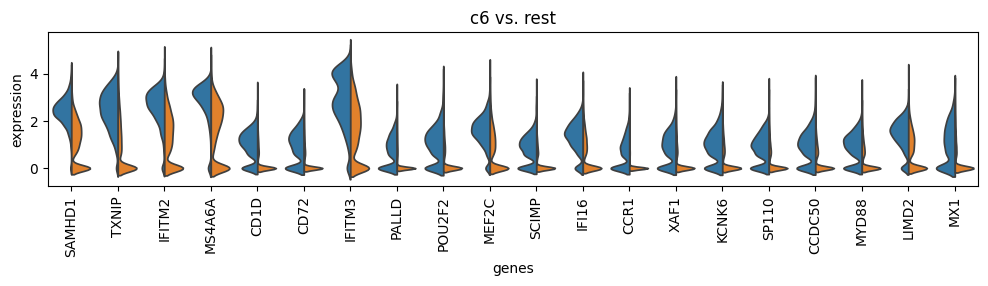

/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/plotting/_tools/__init__.py:1320: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


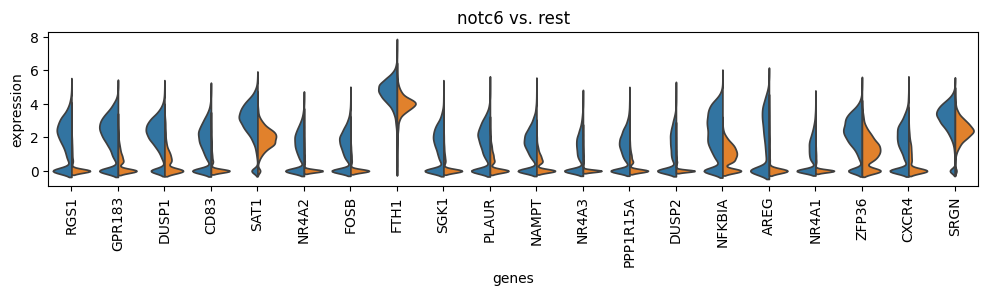

In [36]:
with plt.rc_context({"figure.figsize": (12, 2)}):
    sc.pl.rank_genes_groups_violin(data_DC2B, key="degs_c6_vs_rest", n_genes=20, jitter=False, strip=False)

In [46]:
# save DEGs
#DC2c6 up vs rest
DC2Bc6_UP = sc.get.rank_genes_groups_df(data_DC2B, group="c6", key="degs_c6_vs_rest")
#rest up vs DC2c6
DC2Bnotc6_UP = sc.get.rank_genes_groups_df(data_DC2B, group="notc6", key="degs_c6_vs_rest")

In [47]:
DC2Bc6_UP.head()

names     scores  logfoldchanges  pvals  pvals_adj
0  SAMHD1  60.629177        2.248811    0.0        0.0
1   TXNIP  58.755280        3.019002    0.0        0.0
2  IFITM2  53.074936        2.226368    0.0        0.0
3  MS4A6A  49.342384        1.918665    0.0        0.0
4    CD1D  47.361607        2.395579    0.0        0.0

In [48]:
DC2Bnotc6_UP.head()

names     scores  logfoldchanges  pvals  pvals_adj
0    RGS1  54.889866        4.245260    0.0        0.0
1  GPR183  54.516743        3.550978    0.0        0.0
2   DUSP1  54.008877        3.042953    0.0        0.0
3    CD83  52.590824        3.846681    0.0        0.0
4    SAT1  51.482979        1.723916    0.0        0.0

In [49]:
# change any p values that are 0.0 to 2.2250738585072014e-308
min_float = 1e-307
DC2Bc6_UP['pvals'] = DC2Bc6_UP['pvals'].replace(0.0, min_float)
DC2Bc6_UP['pvals_adj'] = DC2Bc6_UP['pvals_adj'].replace(0.0, min_float)

DC2Bnotc6_UP['pvals'] = DC2Bnotc6_UP['pvals'].replace(0.0, min_float)
DC2Bnotc6_UP['pvals_adj'] = DC2Bnotc6_UP['pvals_adj'].replace(0.0, min_float)

In [50]:
DC2Bnotc6_UP.head()

names     scores  logfoldchanges          pvals      pvals_adj
0    RGS1  54.889866        4.245260  1.000000e-307  1.000000e-307
1  GPR183  54.516743        3.550978  1.000000e-307  1.000000e-307
2   DUSP1  54.008877        3.042953  1.000000e-307  1.000000e-307
3    CD83  52.590824        3.846681  1.000000e-307  1.000000e-307
4    SAT1  51.482979        1.723916  1.000000e-307  1.000000e-307

In [51]:
#export degs to csv
DC2Bc6_UP.to_csv("DEGs_DC2B_c6_UP.csv", index=False)
DC2Bnotc6_UP.to_csv("DEGs_DC2b_notc6_UP.csv", index=False)

In [61]:
# extract top 20 genes
top_up = DC2Bc6_UP.head(20)['names'].tolist()
top_down = DC2Bnotc6_UP.head(20)['names'].tolist()

In [62]:
top_down

['RGS1',
 'GPR183',
 'DUSP1',
 'CD83',
 'SAT1',
 'NR4A2',
 'FOSB',
 'FTH1',
 'SGK1',
 'PLAUR',
 'NAMPT',
 'NR4A3',
 'PPP1R15A',
 'DUSP2',
 'NFKBIA',
 'AREG',
 'NR4A1',
 'ZFP36',
 'CXCR4',
 'SRGN']

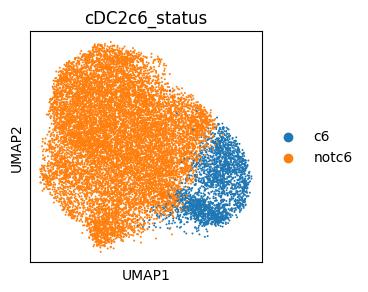

In [63]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data_DC2B, color=["cDC2c6_status"], size=8)

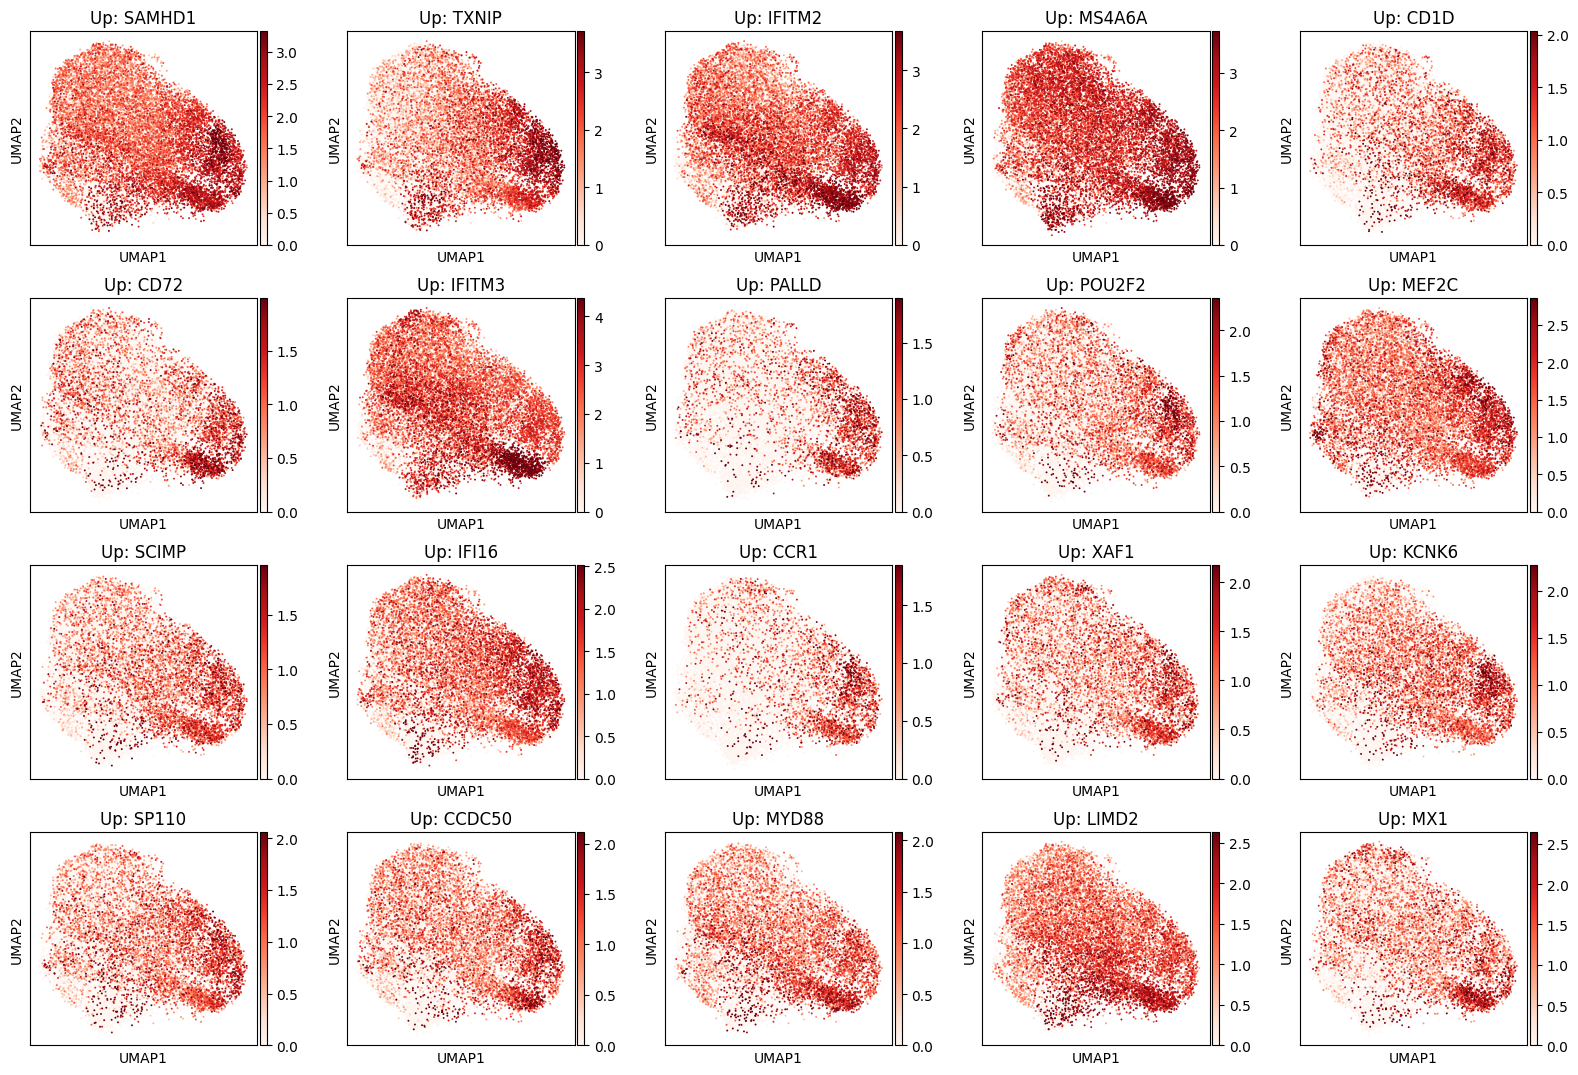

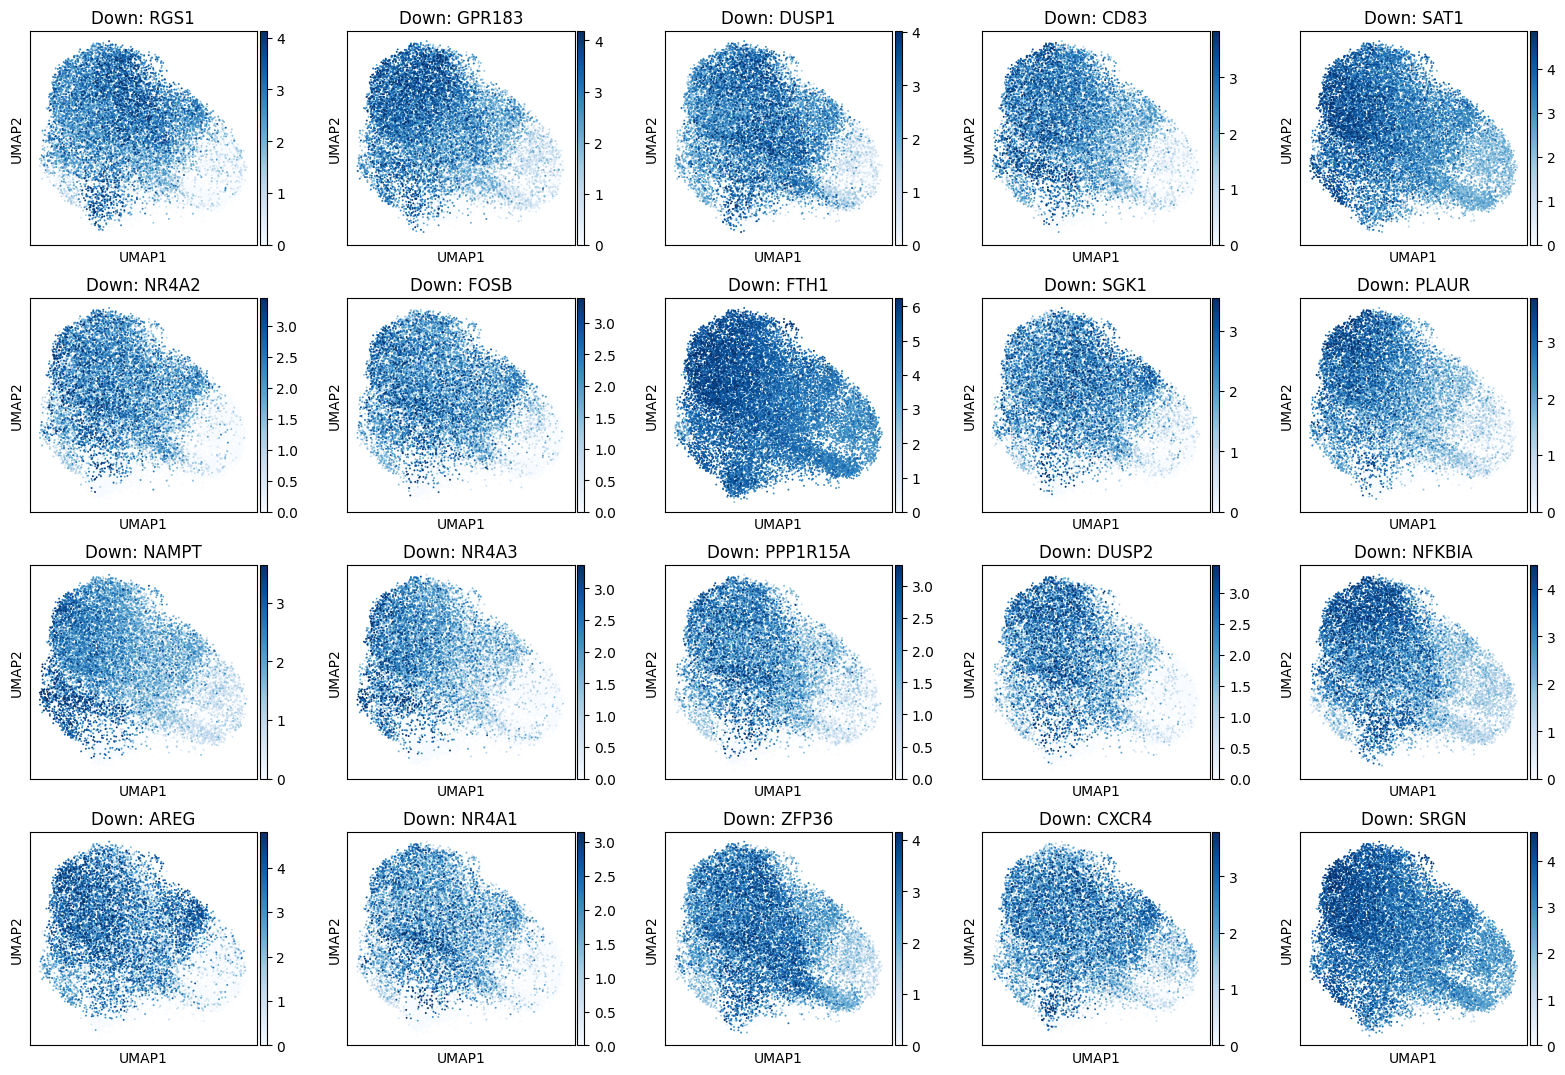

In [66]:
# Plot top upregulated genes
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(
        data_DC2B,
        color=top_up,
        title=[f"Up: {g}" for g in top_up],
        ncols=5,
        cmap="Reds",
        vmax="p99"
    )

    # Plot top downregulated genes
    sc.pl.umap(
        data_DC2B,
        color=top_down,
        title=[f"Down: {g}" for g in top_down],
        ncols=5,
        cmap="Blues",
        vmax="p99"
    )

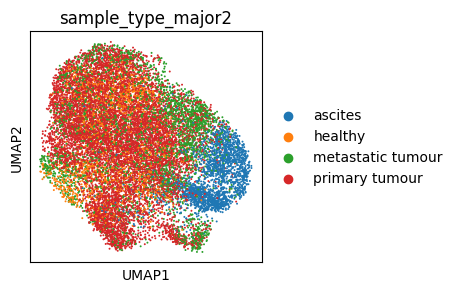

In [44]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data_DC2, color=["sample_type_major2"], ncols=4, size=8)

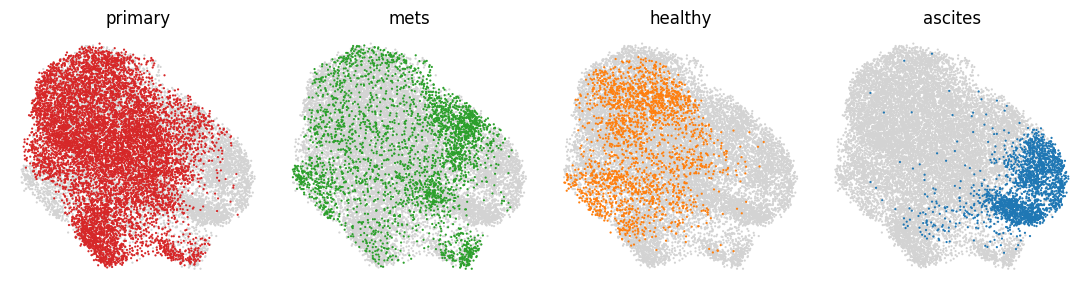

In [79]:
fig, axes = plt.subplots(1, 4, figsize=(11, 3))
sc.pl.umap(data_DC2, color="sample_type_major2", groups=["primary tumour"], size=10, title="primary", frameon=False, legend_loc=None, ax=axes[0], show=False)
sc.pl.umap(data_DC2, color="sample_type_major2", groups=["metastatic tumour"], size=10, title="mets", frameon=False, legend_loc=None, ax=axes[1], show=False)
sc.pl.umap(data_DC2, color="sample_type_major2", groups=["healthy"], size=10, title="healthy", frameon=False, legend_loc=None, ax=axes[2], show=False)
sc.pl.umap(data_DC2, color="sample_type_major2", groups=["ascites"], size=10, title="ascites", frameon=False, legend_loc=None, ax=axes[3], show=False)
plt.tight_layout()
plt.show()

# Subset out cDC1 from full DC object. 

In [3]:
# read in data
data = sc.read_h5ad('20250617_AllDC_bbknn.h5ad')

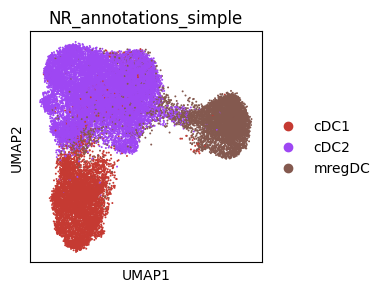

In [4]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data, color=["NR_annotations_simple"], ncols=4, size=8)

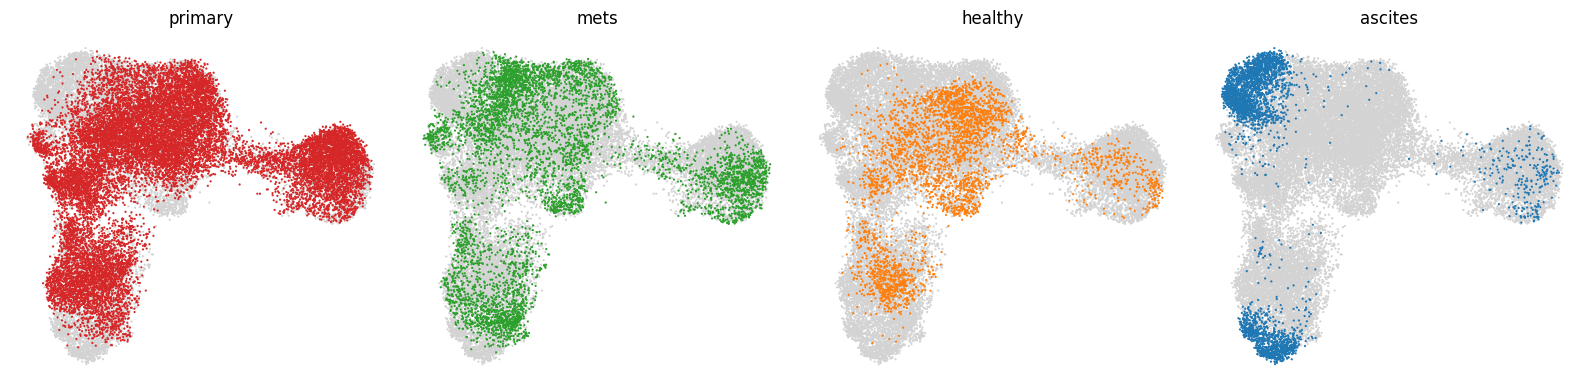

In [5]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
sc.pl.umap(data, color="sample_type_major2", groups=["primary tumour"], size=10, title="primary", frameon=False, legend_loc=None, ax=axes[0], show=False)
sc.pl.umap(data, color="sample_type_major2", groups=["metastatic tumour"], size=10, title="mets", frameon=False, legend_loc=None, ax=axes[1], show=False)
sc.pl.umap(data, color="sample_type_major2", groups=["healthy"], size=10, title="healthy", frameon=False, legend_loc=None, ax=axes[2], show=False)
sc.pl.umap(data, color="sample_type_major2", groups=["ascites"], size=10, title="ascites", frameon=False, legend_loc=None, ax=axes[3], show=False)
plt.tight_layout()
plt.show()

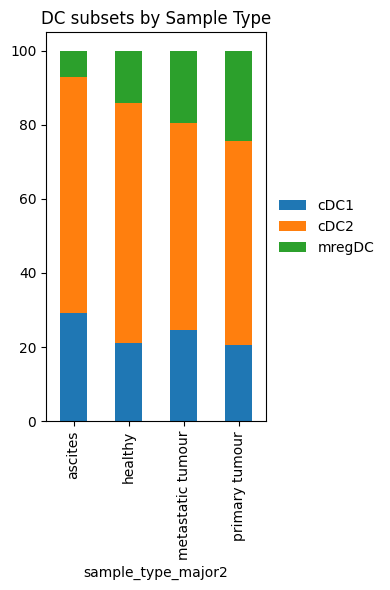

In [6]:
pd.crosstab(data.obs["sample_type_major2"], data.obs["NR_annotations_simple"]).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True, figsize=(4,6))
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)
plt.title("DC subsets by Sample Type")
plt.tight_layout()  
plt.show()

### Looks like cDC1 are also distinct in ascites, need to read in pre-hvg object, subset out cDC1, repeat clustering, and then caluclate degs:

In [7]:
# read in data
data_labels = data
data_clean_prehvg = sc.read_h5ad('NR_cleandata.h5ad')

In [8]:
data_labels

AnnData object with n_obs × n_vars = 29887 × 1746
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'mregDC_sig'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions'

In [9]:
data_clean_prehvg

AnnData object with n_obs × n_vars = 498382 × 15074
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'log1p'

In [10]:
#subset data_clean_prehvg to only the cells in data_labels based on barcode

# Get the list of barcodes (cell names) in data_labels
barcodes_to_keep = data_labels.obs.index

# subset data_clean_prehvg to just those in data_labels
data_clean_prehvg2 = data_clean_prehvg[data_clean_prehvg.obs.index.isin(barcodes_to_keep), :]

data_clean_prehvg2

View of AnnData object with n_obs × n_vars = 29887 × 15074
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'log1p'

In [11]:
# transfer metadata from final atlas (data_labels) to clean data pre-hvg (want pre-hvg data so I can re-do hvg calculation on just DC1)

#define columns to transfer
meta_columns = ['Technology','NR_annotations_simple','sample_type_major2','cancer_with_H','cancer_broadest','patient_treatment']

# Subset the metadata in data_labels to match data_clean_prehvg2's barcodes
metadata_to_transfer = data_labels.obs.loc[data_clean_prehvg2.obs.index, meta_columns]

# Add these columns to data_clean_prehvg2's obs
for col in meta_columns:
    data_clean_prehvg2.obs[col] = metadata_to_transfer[col]

# Verify that the metadata was transferred
data_clean_prehvg2.obs.tail()

/scratch/temp/17666447/ipykernel_1897711/2094201470.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


nCount_RNA  nFeature_RNA  \
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...   -9.995153     -8.131683   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...   -9.134331     -8.627023   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...  -10.033317     -7.518040   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...   -9.364501     -8.566583   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...   -9.738727     -7.459797   

                                                   sample_type cancer_type  \
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...      Adnexa       HGSOC   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...      Adnexa       HGSOC   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...      Adnexa       HGSOC   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...      Adnexa       HGSOC   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...      Adnexa       HGSOC   

                                                     patient_id  \
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...  Left Adnexa   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...  Left Adnexa   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...  Left Adnexa   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...  Left Adnexa   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...  Left Adnexa   

                                                                              sample_id  \
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...  SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...  SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...  SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...  SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...  SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY   

                                                    percent.mt   site  \
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...      2694.0  ovary   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...       839.0  ovary   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...      1683.0  ovary   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...      2257.0  ovary   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...       949.0  ovary   

                                                   sample_type_major  \
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...    primary tumour   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...    primary tumour   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...    primary tumour   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...    primary tumour   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...    primary tumour   

                                                   cancer_subtype  ...  \
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...          HGSOC  ...   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...          HGSOC  ...   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...          HGSOC  ...   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...          HGSOC  ...   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...          HGSOC  ...   

                                                   leiden_DC leiden_DC_v2  \
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...         4            1   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...         2            4   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...         3            2   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...         5           15   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...         3            2   

                                                   exclude_annots  leiden_M  \
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...             NA       NaN   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...             NA       NaN   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...             NA       NaN   
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_O...      

In [12]:
data_labels.obs["NR_annotations_simple"].value_counts()

NR_annotations_simple
cDC2      17166
cDC1       6670
mregDC     6051
Name: count, dtype: int64

In [13]:
data_clean_prehvg2.obs["NR_annotations_simple"].value_counts()

NR_annotations_simple
cDC2      17166
cDC1       6670
mregDC     6051
Name: count, dtype: int64

In [14]:
# subset to just cDC1
data_DC1 = data_clean_prehvg2[data_clean_prehvg2.obs["NR_annotations_simple"] == "cDC1"]

In [15]:
# check
data_DC1.obs["NR_annotations_simple"].value_counts()

NR_annotations_simple
cDC1    6670
Name: count, dtype: int64

In [16]:
# free up memory
del data_clean_prehvg2  
del data_labels

# Filtering:

In [17]:
# remove any samples with less than 10 cells
data_DC1 = data_DC1[data_DC1.obs['integration_id'].map(data_DC1.obs['integration_id'].value_counts()) >= 10].copy()

In [18]:
# remove any genes expressed in less than 10 cells
sc.pp.filter_genes(data_DC1, min_cells=10)

# pre-hvg to integration on new DC1 only object:

In [19]:
data_DC1

AnnData object with n_obs × n_vars = 5438 × 12578
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'log1p'

In [20]:
# identify highly variable genes
sc.pp.highly_variable_genes(data_DC1, min_mean=0.0125, max_mean=3, min_disp=0.5)
data_DC1

AnnData object with n_obs × n_vars = 5438 × 12578
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [21]:
#set hidden slot
data_DC1.raw = data_DC1

In [22]:
#to get number of HV genes
print(data_DC1.var.highly_variable.sum())

2374


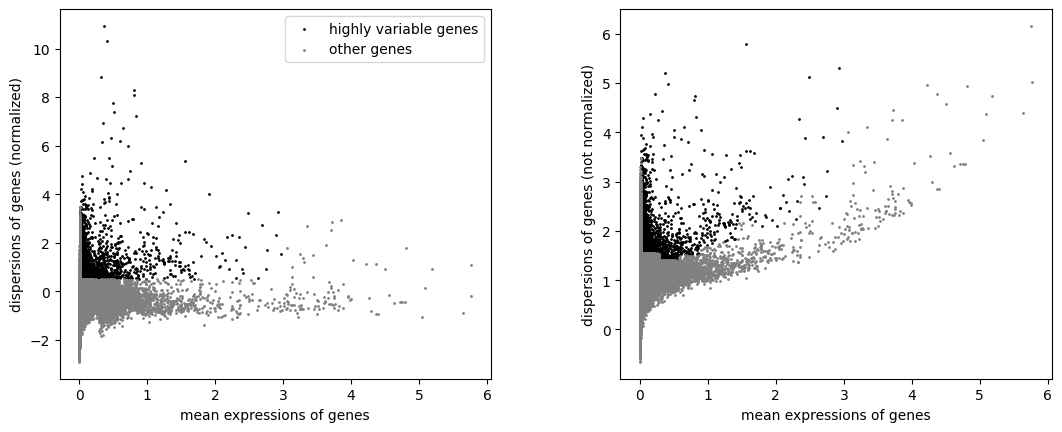

In [23]:
#plot out the number of highly variable genes
sc.pl.highly_variable_genes(data_DC1)

### regress out factors and perform scaling

In [24]:
# Actually do the filtering for PCA
data_DC1 = data_DC1[
    :, data_DC1.var.highly_variable
].copy()  # all rows/indexes : columns only selecting for those within high_variable, and then making a copy of itself
data_DC1

AnnData object with n_obs × n_vars = 5438 × 2374
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [25]:
#Regress out total counts, %mt, cycling genes (30sec)
sc.pp.regress_out(data_DC1, ["total_counts", "pct_counts_mt", 'S_score', 'G2M_score'])
sc.pp.scale(data_DC1, max_value=10)

In [26]:
data_DC1

AnnData object with n_obs × n_vars = 5438 × 2374
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'lo

### Perform PCA:

In [27]:
## perform PCA, adjust number of PCs to calculate. (1mins)
sc.pp.pca(data_DC1, n_comps=50)

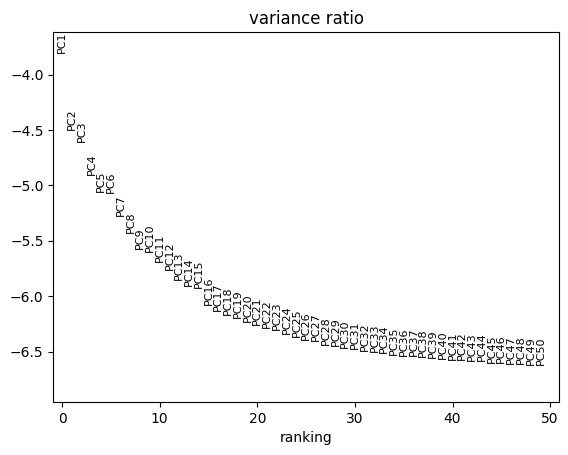

In [28]:
# make elbow plot to see variance contribution by each pc, choose inflection point
sc.pl.pca_variance_ratio(data_DC1, log=True, n_pcs=50)

### BBKNN Integration: 
* using bbknn for batch correction instead of Harmony, same as done for DC2 object 

In [29]:
sce.pp.bbknn(data_DC1, batch_key='integration_id')  

In [30]:
data_DC1.obsm

AxisArrays with keys: X_pca

### UMAP:

In [31]:
sc.tl.umap(data_DC1, min_dist=0.3) 

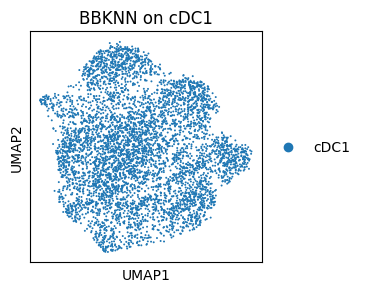

In [34]:
#plotting DC1 map
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data_DC1, color=["NR_annotations_simple"], ncols=1, size=8, title='BBKNN on cDC1')

In [35]:
data_DC1.write_h5ad("20251020_DC1_bbknn_clustered.h5ad", compression="gzip")

In [3]:
data_DC1 = sc.read_h5ad('20251020_DC1_bbknn_clustered.h5ad') 

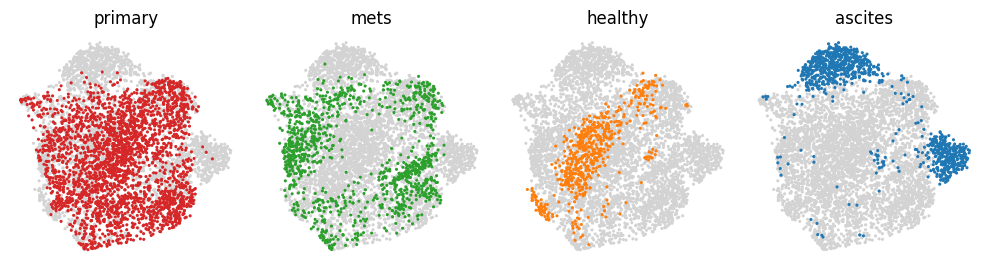

In [4]:
fig, axes = plt.subplots(1, 4, figsize=(10, 2.8))
sc.pl.umap(data_DC1, color="sample_type_major2", groups=["primary tumour"], size=20, title="primary", frameon=False, legend_loc=None, ax=axes[0], show=False)
sc.pl.umap(data_DC1, color="sample_type_major2", groups=["metastatic tumour"], size=20, title="mets", frameon=False, legend_loc=None, ax=axes[1], show=False)
sc.pl.umap(data_DC1, color="sample_type_major2", groups=["healthy"], size=20, title="healthy", frameon=False, legend_loc=None, ax=axes[2], show=False)
sc.pl.umap(data_DC1, color="sample_type_major2", groups=["ascites"], size=20, title="ascites", frameon=False, legend_loc=None, ax=axes[3], show=False)
plt.tight_layout()
plt.show()

# Clustering DC1:

In [5]:
# cluster (3min)
sc.tl.leiden(data_DC1, resolution=0.2, key_added='2025-DC1-02')
sc.tl.leiden(data_DC1, resolution=0.5, key_added='2025-DC1-05')
sc.tl.leiden(data_DC1, resolution=0.8, key_added='2025-DC1-08')

/scratch/temp/17746368/ipykernel_3733850/3393079703.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.


In [6]:
colour_vars = ['2025-DC1-02', '2025-DC1-05', '2025-DC1-08']

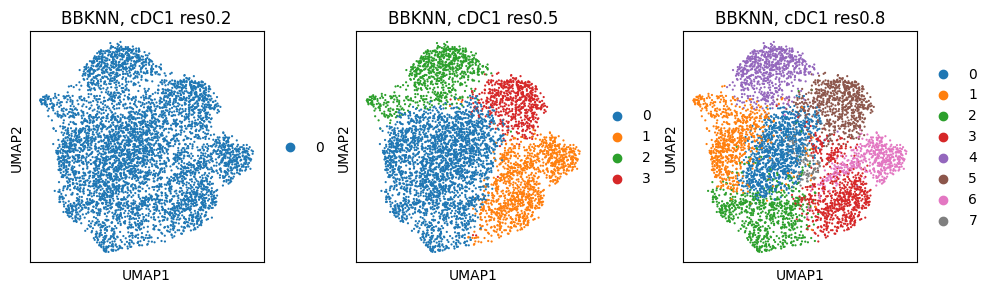

In [7]:
#plotting clusters 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data_DC1, color=colour_vars, ncols = 3, size=10, title=["BBKNN, cDC1 res0.2","BBKNN, cDC1 res0.5","BBKNN, cDC1 res0.8"])

### Use 0.8 res

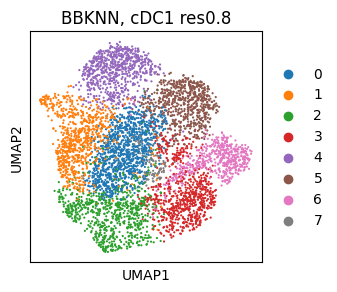

In [8]:
#plotting clusters 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data_DC1, color='2025-DC1-08', ncols = 1, size=10, title=["BBKNN, cDC1 res0.8"])

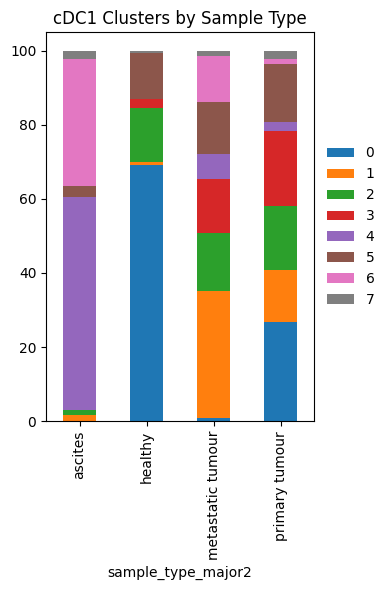

In [51]:
pd.crosstab(data_DC1.obs["sample_type_major2"], data_DC1.obs["2025-DC1-08"]).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True, figsize=(4,6))
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)
plt.title("cDC1 Clusters by Sample Type")
plt.tight_layout()  
plt.show()

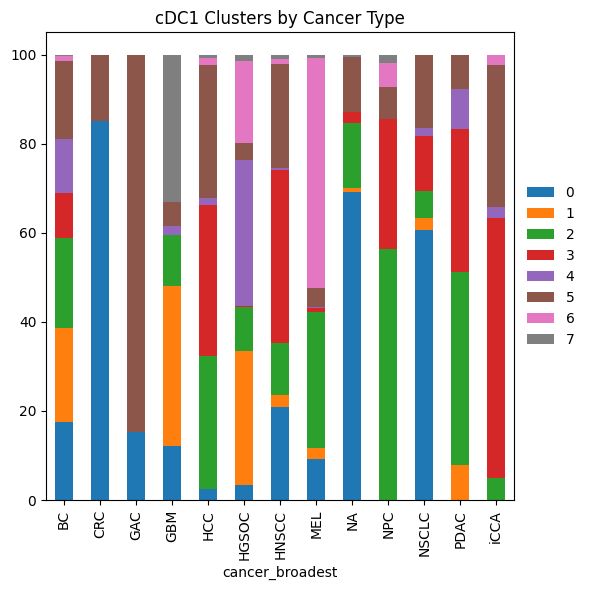

In [53]:
pd.crosstab(data_DC1.obs["cancer_broadest"], data_DC1.obs["2025-DC1-08"]).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True, figsize=(6,6))
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)
plt.title("cDC1 Clusters by Cancer Type")
plt.tight_layout()  
plt.show()

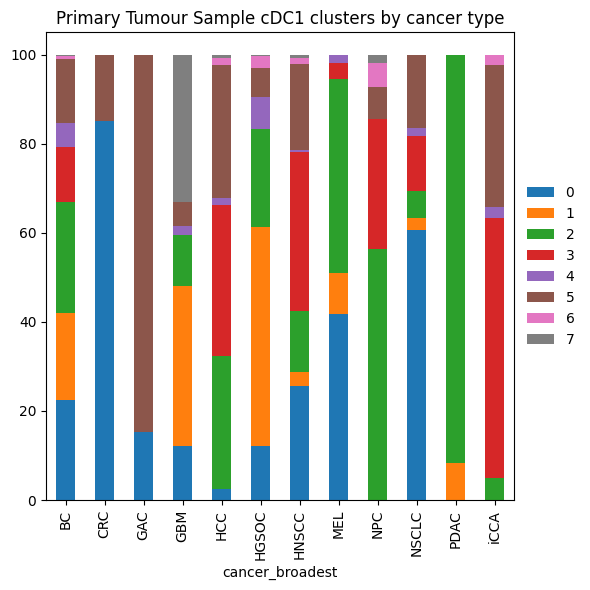

In [54]:
# subset to just primary
data_DC1_P = data_DC1[data_DC1.obs["sample_type_major2"] == "primary tumour"]

pd.crosstab(data_DC1_P.obs["cancer_broadest"], data_DC1_P.obs["2025-DC1-08"]).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True, figsize=(6,6))
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)
plt.title("Primary Tumour Sample cDC1 clusters by cancer type")
plt.tight_layout()  
plt.show()

### Ascites predominately made up of cluster 6 and 4
### cluster 7 mainly only in GBM
### Next identify degs for each cluster, and specifically look at degs for clusters 6 and 4 compared to rest (or pool 6 and 4 together and compare to rest)
* DEGS between all clusters -- done
* DEGS between cluster 4/6 combined vs rest 
* DEGS between cluster 4 vs cluster 6 (to identify two ascites populations?)

In [55]:
# check annots
print(data_DC1.obs['2025-DC1-08'].value_counts())

2025-DC1-08
0    1163
1     783
2     741
3     734
4     716
5     685
6     515
7     101
Name: count, dtype: int64


### DEGS between all clusters

In [9]:
#calculate DEG genes between clusters:
sc.tl.rank_genes_groups(data_DC1, groupby="2025-DC1-08", method="wilcoxon", key_added="degs_cDC1_8clusters")

/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/plotting/_tools/__init__.py:1320: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


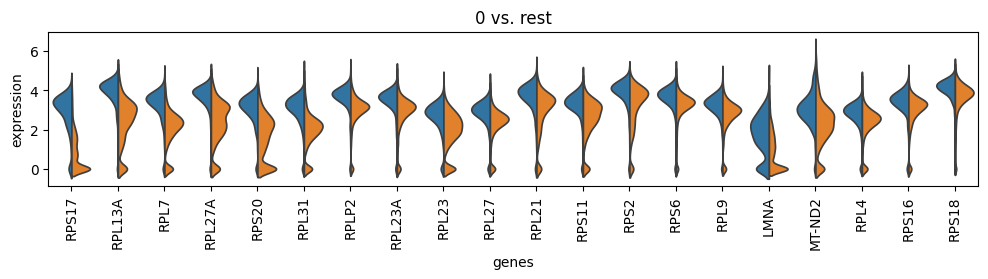

/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/plotting/_tools/__init__.py:1320: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


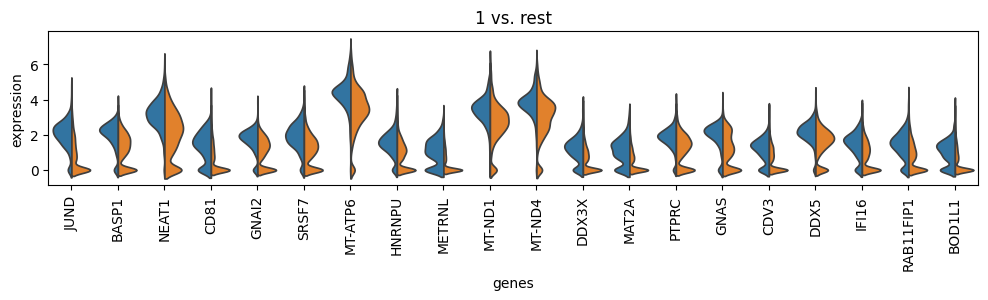

/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/plotting/_tools/__init__.py:1320: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


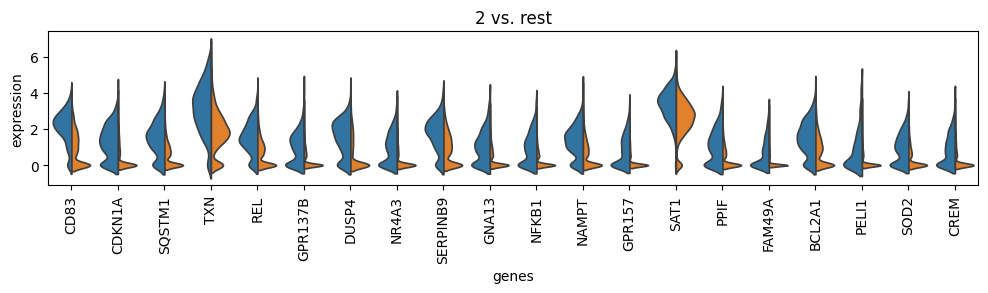

/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/plotting/_tools/__init__.py:1320: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


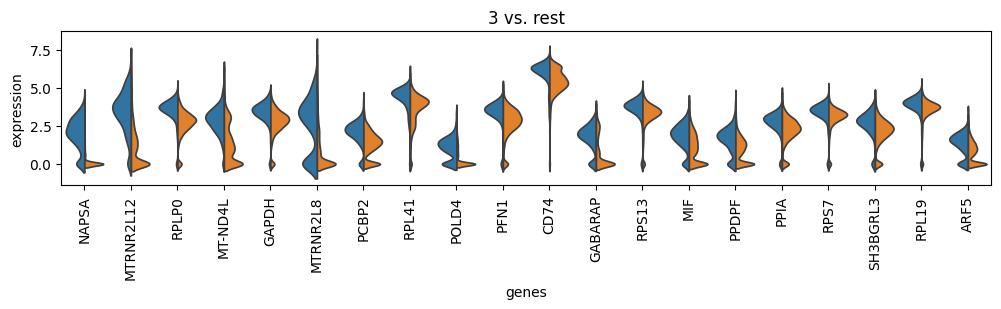

/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/plotting/_tools/__init__.py:1320: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


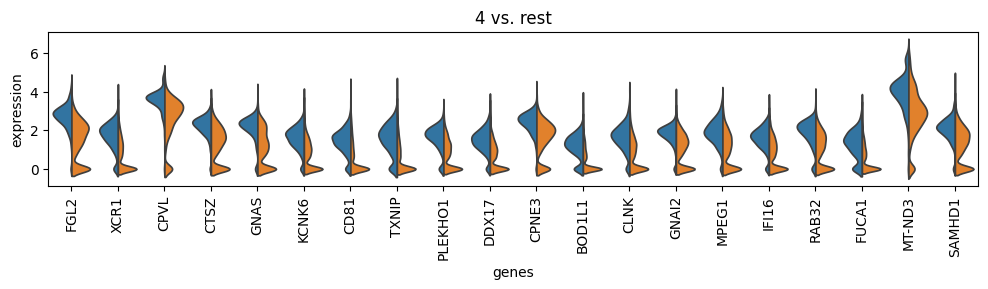

/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/plotting/_tools/__init__.py:1320: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


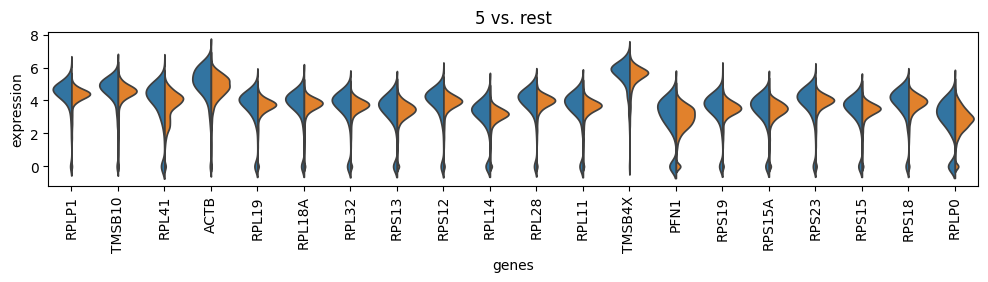

/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/plotting/_tools/__init__.py:1320: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


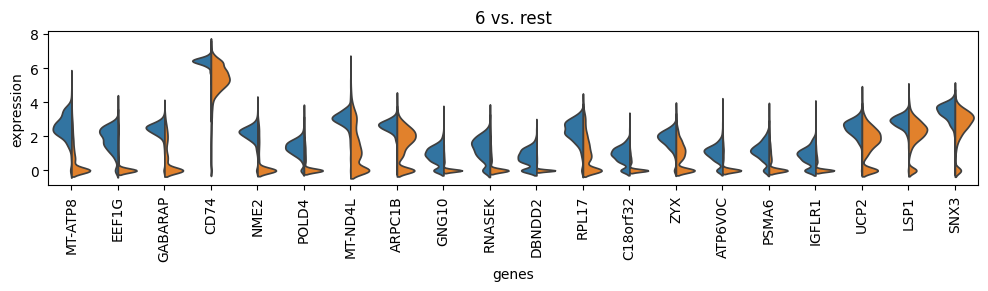

/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/plotting/_tools/__init__.py:1320: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


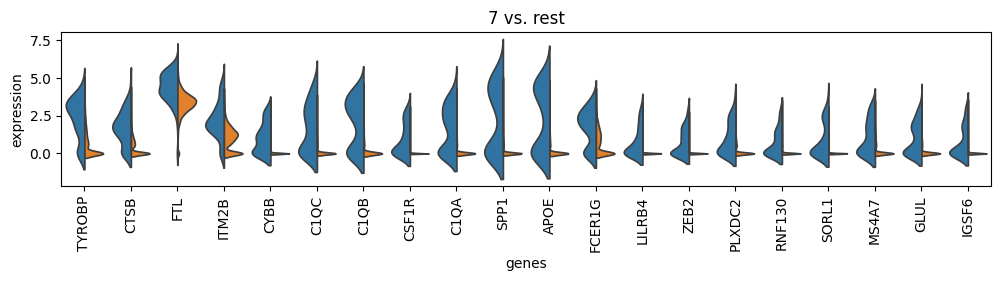

In [10]:
with plt.rc_context({"figure.figsize": (12, 2)}):
    sc.pl.rank_genes_groups_violin(data_DC1, key="degs_cDC1_8clusters", n_genes=20, jitter=False, strip=False)

In [58]:
# save DEGs
DC1c0_UP = sc.get.rank_genes_groups_df(data_DC1, group="0", key="degs_cDC1_8clusters")
DC1c1_UP = sc.get.rank_genes_groups_df(data_DC1, group="1", key="degs_cDC1_8clusters")
DC1c2_UP = sc.get.rank_genes_groups_df(data_DC1, group="2", key="degs_cDC1_8clusters")
DC1c3_UP = sc.get.rank_genes_groups_df(data_DC1, group="3", key="degs_cDC1_8clusters")
DC1c4_UP = sc.get.rank_genes_groups_df(data_DC1, group="4", key="degs_cDC1_8clusters")
DC1c5_UP = sc.get.rank_genes_groups_df(data_DC1, group="5", key="degs_cDC1_8clusters")
DC1c6_UP = sc.get.rank_genes_groups_df(data_DC1, group="6", key="degs_cDC1_8clusters")
DC1c7_UP = sc.get.rank_genes_groups_df(data_DC1, group="7", key="degs_cDC1_8clusters")


In [59]:
DC1c0_UP.head()

names     scores  logfoldchanges  pvals  pvals_adj
0   RPS17  42.298649        3.623477    0.0        0.0
1  RPL13A  40.365757        2.246816    0.0        0.0
2    RPL7  39.030201        1.914142    0.0        0.0
3  RPL27A  38.972935        1.965438    0.0        0.0
4   RPS20  38.708920        2.348655    0.0        0.0

In [60]:
# change any p values that are 0.0 to 2.2250738585072014e-308
min_float = 1e-307
DC1c0_UP['pvals'] = DC1c0_UP['pvals'].replace(0.0, min_float)
DC1c0_UP['pvals_adj'] = DC1c0_UP['pvals_adj'].replace(0.0, min_float)

DC1c1_UP['pvals'] = DC1c1_UP['pvals'].replace(0.0, min_float)
DC1c1_UP['pvals_adj'] = DC1c1_UP['pvals_adj'].replace(0.0, min_float)

DC1c2_UP['pvals'] = DC1c2_UP['pvals'].replace(0.0, min_float)
DC1c2_UP['pvals_adj'] = DC1c2_UP['pvals_adj'].replace(0.0, min_float)

DC1c3_UP['pvals'] = DC1c3_UP['pvals'].replace(0.0, min_float)
DC1c3_UP['pvals_adj'] = DC1c3_UP['pvals_adj'].replace(0.0, min_float)

DC1c4_UP['pvals'] = DC1c4_UP['pvals'].replace(0.0, min_float)
DC1c4_UP['pvals_adj'] = DC1c4_UP['pvals_adj'].replace(0.0, min_float)

DC1c5_UP['pvals'] = DC1c5_UP['pvals'].replace(0.0, min_float)
DC1c5_UP['pvals_adj'] = DC1c5_UP['pvals_adj'].replace(0.0, min_float)

DC1c6_UP['pvals'] = DC1c6_UP['pvals'].replace(0.0, min_float)
DC1c6_UP['pvals_adj'] = DC1c6_UP['pvals_adj'].replace(0.0, min_float)

DC1c7_UP['pvals'] = DC1c7_UP['pvals'].replace(0.0, min_float)
DC1c7_UP['pvals_adj'] = DC1c7_UP['pvals_adj'].replace(0.0, min_float)

In [61]:
DC1c0_UP.head()

names     scores  logfoldchanges          pvals      pvals_adj
0   RPS17  42.298649        3.623477  1.000000e-307  1.000000e-307
1  RPL13A  40.365757        2.246816  1.000000e-307  1.000000e-307
2    RPL7  39.030201        1.914142  1.000000e-307  1.000000e-307
3  RPL27A  38.972935        1.965438  1.000000e-307  1.000000e-307
4   RPS20  38.708920        2.348655  1.000000e-307  1.000000e-307

In [62]:
#export degs to csv
DC1c0_UP.to_csv("DEGs_DC1c0_UP.csv", index=False)
DC1c1_UP.to_csv("DEGs_DC1c1_UP.csv", index=False)
DC1c2_UP.to_csv("DEGs_DC1c2_UP.csv", index=False)
DC1c3_UP.to_csv("DEGs_DC1c3_UP.csv", index=False)
DC1c4_UP.to_csv("DEGs_DC1c4_UP.csv", index=False)
DC1c5_UP.to_csv("DEGs_DC1c5_UP.csv", index=False)
DC1c6_UP.to_csv("DEGs_DC1c6_UP.csv", index=False)
DC1c7_UP.to_csv("DEGs_DC1c7_UP.csv", index=False)


### DEGS between 4/6 vs rest

In [11]:
# make meta column for cluster 4/6 vs rest
data_DC1.obs["cDC1c4c6_status"] = data_DC1.obs["2025-DC1-08"].map(
    {
        "0": "notc4c6",
        "1": "notc4c6",
        "2": "notc4c6",
        "3": "notc4c6",
        "4": "c4c6",
        "5": "notc4c6",
        "6": "c4c6",
        "7": "notc4c6"
    }
)

In [12]:
#calculate DEG genes between c4/6 and rest:
sc.tl.rank_genes_groups(data_DC1, groupby="cDC1c4c6_status", method="wilcoxon", key_added="degs_cDC1_c4c6")

/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/plotting/_tools/__init__.py:1320: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


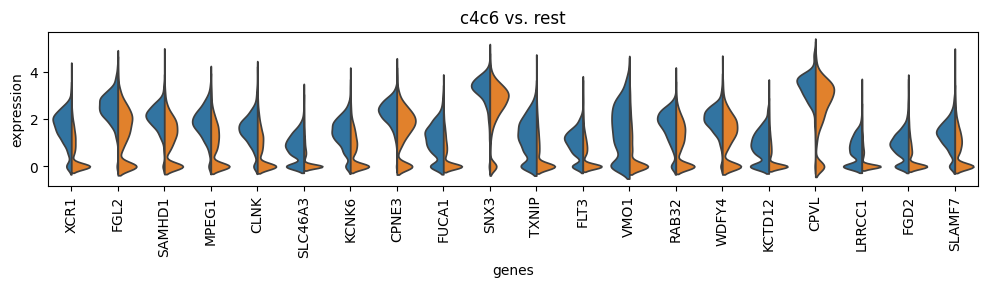

/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/plotting/_tools/__init__.py:1320: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


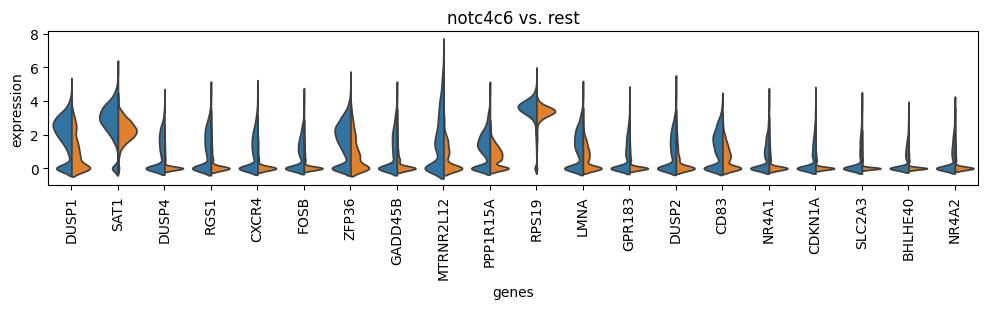

In [66]:
with plt.rc_context({"figure.figsize": (12, 2)}):
    sc.pl.rank_genes_groups_violin(data_DC1, key="degs_cDC1_c4c6", n_genes=20, jitter=False, strip=False)

In [67]:
# save DEGs
DC1c4c6_UP = sc.get.rank_genes_groups_df(data_DC1, group="c4c6", key="degs_cDC1_c4c6")
DC1notc4c6_UP = sc.get.rank_genes_groups_df(data_DC1, group="notc4c6", key="degs_cDC1_c4c6")

In [68]:
DC1c4c6_UP.head()

names     scores  logfoldchanges          pvals      pvals_adj
0    XCR1  36.020672        2.330031  3.971388e-284  4.995212e-280
1    FGL2  33.899853        1.858387  6.695441e-252  4.210763e-248
2  SAMHD1  32.371014        1.618028  7.023644e-230  2.944780e-226
3   MPEG1  32.160999        1.822699  6.198873e-227  1.949236e-223
4    CLNK  30.824757        1.796866  1.221051e-208  3.071675e-205

In [ ]:
# change any p values that are 0.0 to 2.2250738585072014e-308
min_float = 1e-307
DC1c4c6_UP['pvals'] = DC1c4c6_UP['pvals'].replace(0.0, min_float)
DC1c4c6_UP['pvals_adj'] = DC1c4c6_UP['pvals_adj'].replace(0.0, min_float)

DC1notc4c6_UP['pvals'] = DC1notc4c6_UP['pvals'].replace(0.0, min_float)
DC1notc4c6_UP['pvals_adj'] = DC1notc4c6_UP['pvals_adj'].replace(0.0, min_float)

In [70]:
DC1c4c6_UP.head()

names     scores  logfoldchanges          pvals      pvals_adj
0    XCR1  36.020672        2.330031  3.971388e-284  4.995212e-280
1    FGL2  33.899853        1.858387  6.695441e-252  4.210763e-248
2  SAMHD1  32.371014        1.618028  7.023644e-230  2.944780e-226
3   MPEG1  32.160999        1.822699  6.198873e-227  1.949236e-223
4    CLNK  30.824757        1.796866  1.221051e-208  3.071675e-205

In [71]:
#export degs to csv
DC1c4c6_UP.to_csv("DEGs_DC1c4c6_UP.csv", index=False)
DC1notc4c6_UP.to_csv("DEGs_DC1notc4c6_UP.csv", index=False)

### DEGS between c4 and c6

In [13]:
# subset to just c4 and c6
data_DC1_c4c6 = data_DC1[data_DC1.obs["cDC1c4c6_status"] == "c4c6"]

In [14]:
# check annots
print(data_DC1_c4c6.obs['2025-DC1-08'].value_counts())

2025-DC1-08
4    716
6    515
Name: count, dtype: int64


In [15]:
#calculate DEG genes between c4 and c6:
sc.tl.rank_genes_groups(data_DC1_c4c6, groupby="2025-DC1-08", method="wilcoxon", key_added="degs_cDC1_4vs6")

/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:645: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.


/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/plotting/_tools/__init__.py:1320: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


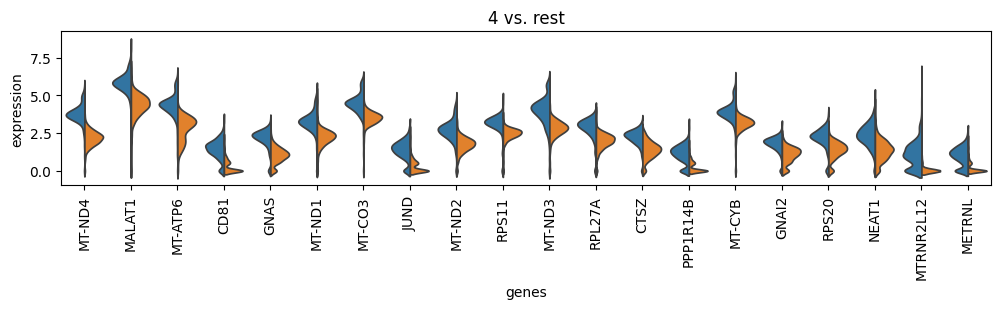

/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/plotting/_tools/__init__.py:1320: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


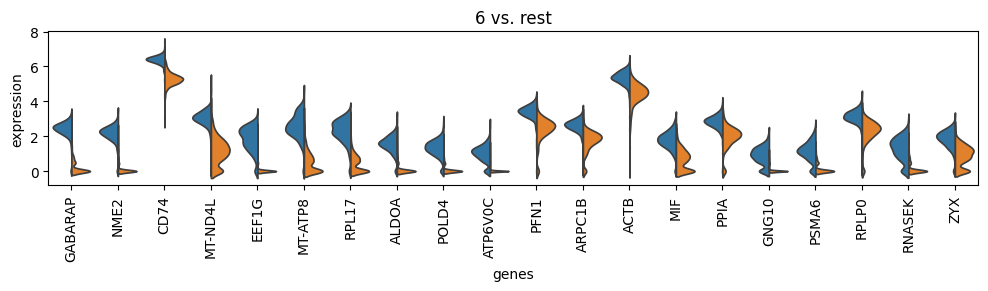

In [76]:
with plt.rc_context({"figure.figsize": (12, 2)}):
    sc.pl.rank_genes_groups_violin(data_DC1_c4c6, key="degs_cDC1_4vs6", n_genes=20, jitter=False, strip=False)

In [77]:
# save DEGs
DC1_4vs6_c4_UP = sc.get.rank_genes_groups_df(data_DC1_c4c6, group="4", key="degs_cDC1_4vs6")
DC1_4vs6_c6_UP = sc.get.rank_genes_groups_df(data_DC1_c4c6, group="6", key="degs_cDC1_4vs6")

In [78]:
DC1_4vs6_c4_UP.head()

names     scores  logfoldchanges          pvals      pvals_adj
0   MT-ND4  27.599905        2.395665  1.115633e-167  1.559159e-164
1   MALAT1  26.266697        2.094923  4.607603e-152  4.458033e-149
2  MT-ATP6  26.096857        2.293638  3.957979e-150  3.555962e-147
3     CD81  24.620625        3.207168  7.597306e-134  4.343587e-131
4     GNAS  24.526604        2.042773  7.686590e-133  4.036464e-130

In [79]:
# change any p values that are 0.0 to 2.2250738585072014e-308
min_float = 1e-307
DC1_4vs6_c4_UP['pvals'] = DC1_4vs6_c4_UP['pvals'].replace(0.0, min_float)
DC1_4vs6_c4_UP['pvals_adj'] = DC1_4vs6_c4_UP['pvals_adj'].replace(0.0, min_float)

DC1_4vs6_c6_UP['pvals'] = DC1_4vs6_c6_UP['pvals'].replace(0.0, min_float)
DC1_4vs6_c6_UP['pvals_adj'] = DC1_4vs6_c6_UP['pvals_adj'].replace(0.0, min_float)

In [80]:
DC1_4vs6_c4_UP.head()

names     scores  logfoldchanges          pvals      pvals_adj
0   MT-ND4  27.599905        2.395665  1.115633e-167  1.559159e-164
1   MALAT1  26.266697        2.094923  4.607603e-152  4.458033e-149
2  MT-ATP6  26.096857        2.293638  3.957979e-150  3.555962e-147
3     CD81  24.620625        3.207168  7.597306e-134  4.343587e-131
4     GNAS  24.526604        2.042773  7.686590e-133  4.036464e-130

In [81]:
#export degs to csv
DC1_4vs6_c4_UP.to_csv("DEGs_DC1_4vs6_c4_UP.csv", index=False)
DC1_4vs6_c6_UP.to_csv("DEGs_DC1_4vs6_c6_UP.csv", index=False)

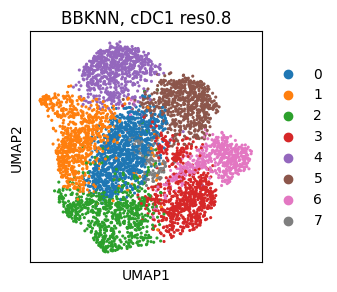

In [17]:
#plotting clusters 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data_DC1, color='2025-DC1-08', ncols = 1, size=20, title=["BBKNN, cDC1 res0.8"])

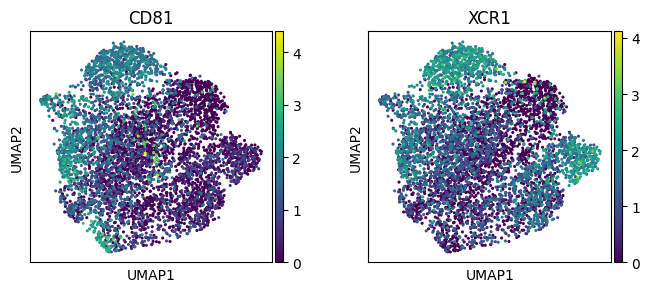

In [18]:
# overlay genes of interest
#plotting clusters 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data_DC1, color=["CD81","XCR1"], ncols = 3, size=20)